In [1]:
print("Multimedia Security Experiment 5")

Multimedia Security Experiment 5


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import myipf
#from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
plt.rcParams["font.sans-serif"] = ["SimHei"] # 用来正常显示中文
plt.rcParams["axes.unicode_minus"] = False # 用来正常显示负号
%config InlineBackend.figure_format = "svg"

In [3]:
img1 = plt.imread("standard_test_images/lena_gray_512.tif")
img2 = plt.imread("standard_test_images/cameraman.tif")

## 1.线性区间灰度变换
实现了反转，伽马变换，对数变换，对比度拉伸和对比度分层，尝试了一下利用圆曲线增亮图像。  
根据不同的函数，原图像的像素值会发生改变。  
伽马变换能够任意赋值，幂值大于1会让图像变暗，幂值小于1会让图像变亮；  
对数变换和反对数变换，对数变换会让图像变亮，反对数变换会让图像变暗；  
对比度拉伸，可以在(1, 0)到(254, 255)（防止斜率为零，但两点可以有相同的横坐标以实现二值化）任意选取两个点实现对比度拉伸，两点之间的线段斜率大于1可增加对比度；  
灰度级分层会将给定的一个区间的像素值都置为同一值，适合检测轮廓，默认基于y=x实现的，也可以基于y=a实现二值化。

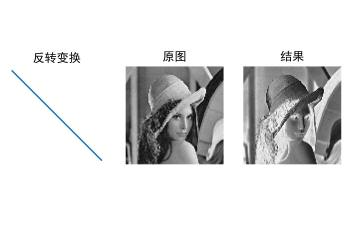

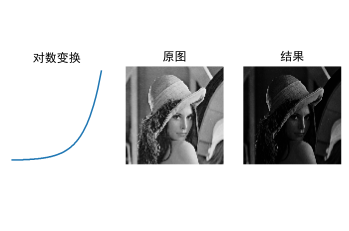

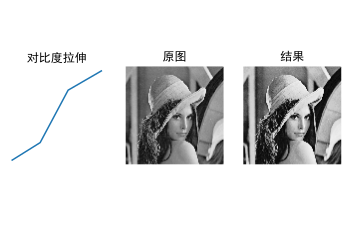

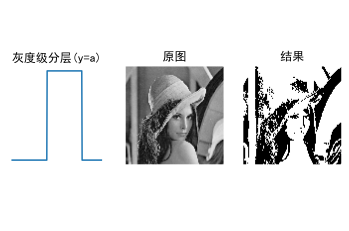

End!


In [4]:
myipf.linearT(img1, "rv") # 反转
myipf.linearT(img1, "log", value="r") # 反对数变换
myipf.linearT(img1, "cr", (80, 50), (160, 200)) # 对比度拉伸
myipf.linearT(img1, "y=a",100,200,a=0,value=255) # 基于y=a型的灰度分层
print("End!")

## 2.直方图

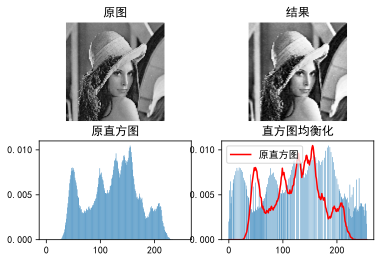

均方差： 108.13776016235352
峰值信噪比： 27.79102990997311


In [5]:
x = np.linspace(0, 255, 256, dtype=np.uint8)
n = myipf.histNorm(img1)
plt.subplot(221), plt.imshow(img1, cmap="gray"), plt.title("原图"), plt.axis("off")
plt.subplot(222), plt.imshow(n, cmap="gray"), plt.title("结果"), plt.axis("off")
plt.subplot(223), plt.bar(x, myipf.toHist(img1) / img1.size), plt.title("原直方图")
plt.subplot(224), plt.bar(x, myipf.toHist(n) / n.size), plt.plot(x, myipf.toHist(img1) / img1.size, c="r", label="原直方图"), plt.title("直方图均衡化")
plt.legend()
plt.show()
myipf.calcMSEPSNR(img1, n)

离散形式的均衡化并不能得到完美平坦的直方图，均衡化过后的直方图跟原图像还比较相似，PSNR接近28dB。总的来看直方图还是有原图的变化趋势，但均衡化后灰度范围更宽，相对平坦一些，对比度提高了。